In [40]:
import pandas

chiller1 = pandas.read_csv('Chiller1(1).csv', index_col=0, parse_dates=[0])
chiller2 = pandas.read_csv('Chiller2(1).csv', index_col=0, parse_dates=[0])
common = pandas.read_csv('Common(1).csv', index_col=0, parse_dates=[0])
chiller1.info()
chiller2.info()
common.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9709 entries, 2022-03-23 11:39:00 to 2022-02-17 18:39:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Flow       9709 non-null   float64
 1   LeaveTemp  9709 non-null   float64
 2   EnterTemp  9709 non-null   float64
 3   kWE        9709 non-null   float64
dtypes: float64(4)
memory usage: 379.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9709 entries, 2022-03-23 11:39:00 to 2022-02-17 18:39:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LeaveTemp  9709 non-null   float64
 1   EnterTemp  9709 non-null   float64
 2   Flow       9709 non-null   float64
 3   kWE        9709 non-null   float64
dtypes: float64(4)
memory usage: 379.3 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9709 entries, 2022-03-23 11:39:00 to 2022-02-17 18:39:00
Data columns (total 3 columns):
 #   Colum

In [7]:
def total_energy_consumption(data):
    return (data['kWE']*5).sum()

In [29]:
chiller1_kew_total = total_energy_consumption(chiller1)
chiller2_kew_total = total_energy_consumption(chiller2)

total_kwe = chiller1_kew_total + chiller2_kew_total

print(f"Total megawatt-hours: {total_kwe/1000} MW")

Total megawatt-hours: 3617.8252127426153 MW


In [51]:
def computeRefrigeration(row) :
    if row.EnterTemp > row.LeaveTemp :
        return (row.EnterTemp - row.LeaveTemp) * row.Flow * 4.19
    else :
        return 0

chiller1['kWR'] = chiller1.apply(computeRefrigeration, axis=1)
chiller2['kWR'] = chiller2.apply(computeRefrigeration, axis=1)

In [52]:
def computeCoefficientOfPerformance(row) :
    if row.kWE > 0 :
        return row.kWR / row.kWE
    else :
        return None

chiller1['COP'] = chiller1.apply(computeCoefficientOfPerformance, axis=1)
chiller2['COP'] = chiller2.apply(computeCoefficientOfPerformance, axis=1)

In [53]:
working1 = chiller1[chiller1.kWE > 0]
working2 = chiller2[chiller1.kWE > 0]

In [54]:
chiller1.info()
chiller2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9709 entries, 2022-03-23 11:39:00 to 2022-02-17 18:39:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Flow       9709 non-null   float64
 1   LeaveTemp  9709 non-null   float64
 2   EnterTemp  9709 non-null   float64
 3   kWE        9709 non-null   float64
 4   kWR        9709 non-null   float64
 5   COP        9709 non-null   float64
dtypes: float64(6)
memory usage: 531.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9709 entries, 2022-03-23 11:39:00 to 2022-02-17 18:39:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LeaveTemp  9709 non-null   float64
 1   EnterTemp  9709 non-null   float64
 2   Flow       9709 non-null   float64
 3   kWE        9709 non-null   float64
 4   kWR        9709 non-null   float64
 5   COP        7503 non-null   float64
dtypes: float64(6)
memory usage: 5

TypeError: '<=' not supported between instances of 'int' and 'str'

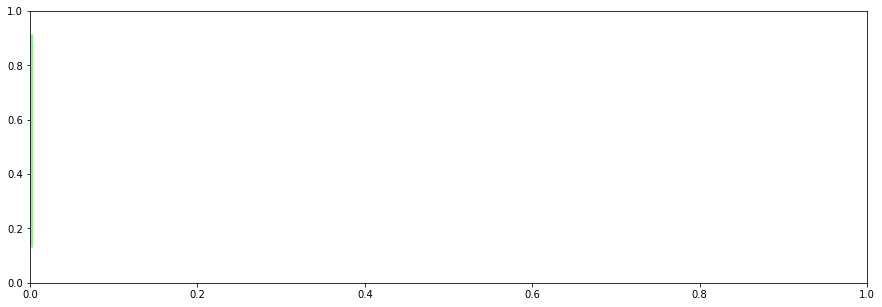

In [59]:
def PlotCOPvsLoad(lower, upper, step, working) :
    bins = range(int(lower), int(upper), int(step))
    group = working.groupby(pandas.cut(working.kWR, bins)).COP
    data = group.mean()
    plot = data.plot.line(figsize=(15,5), yerr=group.std(), ecolor='lightgreen', elinewidth=5, capsize=5,color='orange')
    plot.set_xticks(ticks=range(len(data.index)), labels=data.index, rotation=90)
    plot.set_title('Coefficient of Performance vs Refrigeration Load')
    plot.set_ylabel('Coefficient of Performance')
    plot.set_xlabel('Refrigeration Load (kWR)')

PlotCOPvsLoad(0, 400, 30, working1)
